<a href="https://colab.research.google.com/github/GoshenEngineer/first-repo/blob/main/INDIAN_HOUSE_PRICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


IMPORTING THE DEPENDENCIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# importing the performance evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Data Collection and Processing

In [ ]:
#loading the dataset to the Pandas
df = pd.read_excel('https://query.data.world/s/4rdd2oulnvr7sz5vxfwibanzdhryzi?dws=00000')
pd.set_option('display.max_columns', None)
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
df['number of bedrooms'].dtype

dtype('int64')

In [ ]:
df[['number of bedrooms', 'number of bathrooms','lot area', 'number of floors', 'Price']].max()

,0
number of bedrooms,33.0
number of bathrooms,8.0
lot area,1074218.0
number of floors,3.5
Price,7700000.0


In [ ]:
#checking the first ten rows of the dataset
df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,10,3660,0,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
7,6762813599,42491,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,0,122006,52.9254,-114.482,1570,10578,3,71,750000
8,6762813600,42491,3,2.50,2390,6550,1.0,0,2,4,8,1440,950,1955,0,122009,52.8014,-114.598,2010,6550,1,73,750000
9,6762814461,42491,4,2.25,2200,11250,1.5,0,0,5,7,1300,900,1920,0,122010,52.9145,-114.391,2320,10814,2,53,698000


In [ ]:
#printing the last 10 rows of the dataset
df.tail(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14610,6762828349,42734,4,2.75,1810,7350,1.0,0,0,4,7,1200,610,1980,0,122065,52.6003,-114.361,1750,7350,1,73,272000
14611,6762828783,42734,3,1.75,1350,7686,1.0,0,0,3,7,1350,0,1987,0,122024,52.5917,-114.242,1370,7686,2,70,261000
14612,6762828856,42734,3,1.00,1180,5350,1.5,0,0,4,6,1180,0,1959,0,122063,52.7350,-114.449,1490,5350,3,54,260000
14613,6762829600,42734,3,1.00,1400,10425,1.0,0,0,4,7,1400,0,1968,0,122040,52.5038,-114.491,1440,10425,2,59,241500
14614,6762829669,42734,3,1.75,1590,7931,1.0,0,0,3,7,1190,400,1979,0,122024,52.5928,-114.240,1680,7931,1,80,240000
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,7,1556,0,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,7,1680,0,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,6,1070,0,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,6,1030,0,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14619,6762831463,42734,3,1.00,900,4770,1.0,0,0,3,6,900,0,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


In [ ]:
# get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

Conclusion from the info:
Checking the info of the dataset, the conclusion drawn based on the datatype of each features is that: Most features are Integers excluding the numbers of bathrooms, number of floors, latitude and longitude which are in float.
The datasets consists of our  **23** features in which **4** are in float datatypes while the remaining **(19)** are Integers.

In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

**Variable Description**

Here are the descriptions of the variables in your India House Price prediction dataset:

1. **Id**: This variable serves as a unique identifier for each property in the dataset, allowing for easy referencing and tracking of individual listings. It is typically coded as a categorical variable.

2. **Date**: This variable indicates the date on which the property sale was finalized, providing context for the timing of the transaction. It is typically coded as a continuous variable

3. **Number of bedrooms**: This variable reflects the total number of bedrooms in the house, which can influence both the price and the suitability of the property for potential buyers. It is typically coded as a discrete variable.

4. **Number of bathrooms**: This variable denotes the total number of bathrooms available in the house, an important factor in assessing the functionality and convenience of the property. It is typically coded as a discrete variable.

5. **Living area**: This variable measures the total living space of the house in square feet, indicating the size of the home and contributing to its overall market value. It is typically coded as a continuous variable

6. **Lot area**: This variable represents the total area of the property lot in square feet, which can impact the property's usability and potential for expansion. It is typically coded as a continuous variable.

7. **Numbers of floors**: This variable indicates the total number of floors in the building, which may affect the property's layout and accessibility. It is typically coded as a discrete variable.

8. **Waterfront present**: This binary variable indicates whether the property is located on a waterfront, which is often a desirable feature that can enhance property value. It is typically coded as a categorical variable with values such as 'O' and '1' meaning 'Yes or 'No'.

9. **Number of views**: This variable counts the number of times the property has been viewed on the listing platform, serving as a proxy for interest and demand. It is typically coded as a discrete variable.

10. **Condition of the house**: This variable assesses the physical state of the house, often rated on a scale (e.g., poor, fair, good, excellent) expressed in (1-5), providing insight into potential repair or renovation needs. It is typically coded as an ordinal categorical variable.

11. **Grade of the house**: This variable represents a score that reflects the quality of construction and design of the house, influencing its perceived value and market appeal. It is typically coded as a continuous variable.

12vb. **Area of the house excluding basemen**: This variable measures the total area of the house above the basement in square feet, providing a clear understanding of usable living space. It is typically coded as a continuous variable.

14. **Area of the basement**: This variable quantifies the total area of the basement in square feet, which may be relevant for storage or additional living space. It is typically coded as a continuous variable.

15. **Built Year**: This variable indicates the year the house was originally constructed, offering insight into its age and potential historical significance. It is typically coded as a discrete variable.
15. **Renovation year**: This variable notes the year the house was last renovated or updated, which can provide clues about its current condition and modernity. It is typically coded as a discrete variable
16. **Postal code**: This variable records the postal code of the property's location, helping to identify its geographical context and community characteristics. It is typically coded as a categorical variable.

17. **Latitude**: This variable specifies the geographic latitude coordinate of the property, essential for mapping and spatial analysis. It is typically coded as a continuous variable.

18. **Longitude**: This variable specifies the geographic longitude coordinate of the property, also crucial for mapping and determining location. It is typically coded as a continuous variable.

19. **Living Area renovation**: This variable measures the total living area of the house after any renovations, offering an updated perspective on the property's size. It is typically coded as a continuous variable.

20. **Lot area Renovation**: This variable reflects the total lot area of the property after renovations, providing insight into any changes made to the land. It is typically coded as a continuous variable.

21. **Number of schools nearby**: This variable counts the number of schools located within a specified distance from the property, which can be a significant factor for families considering the area. It is typically coded as a discrete variable.

22. **Distance from the airport**: This variable measures the distance from the property to the nearest airport, often influencing the property's appeal for commuters and travelers. It is typically coded as a continuous variable.

23. **Price**: This variable indicates the final selling price of the property, representing the primary outcome of interest in the dataset. It is typically coded as a continuous variable.

In [ ]:
#checking for the numbers of rows and columns in the data Frame#checking for the numbers of rows and columns in the data Frame
df.shape

(14620, 23)

In [ ]:
#checking for the presence of any missing values in all the columns of the dataset
df.isna().sum()
'''it is deduced that there are no missing values in any of the columns'''

'it is deduced that there are no missing values in any of the columns'

In [ ]:
#checking for any missing values in the whole dataset
df.isna().sum().sum()
'''from here it is concluded that there are no missing values in the dataset.'''

'from here it is concluded that there are no missing values in the dataset.'

Data Cleaning

In [ ]:
#checking the date column since it not the standard date format, so it need to be changed into the proper date format for better visualization
df['Date']

,Date
0,42491
1,42491
2,42491
3,42491
4,42491
...,...
14615,42734
14616,42734
14617,42734
14618,42734


In [ ]:
m  = df['Date']

In [ ]:
pd.to_datetime(42491, unit='D', origin='1899-12-30').date()

datetime.date(2016, 5, 1)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], unit='D', origin='1899-12-30').dt.date

In [ ]:
#now we have the date in the proper format for better visualization and understanding
df['Date']

,Date
0,2016-05-01
1,2016-05-01
2,2016-05-01
3,2016-05-01
4,2016-05-01
...,...
14615,2016-12-30
14616,2016-12-30
14617,2016-12-30
14618,2016-12-30


In [ ]:
#checking the renovation year columns
df['Renovation Year']

,Renovation Year
0,0
1,0
2,0
3,0
4,0
...,...
14615,0
14616,0
14617,0
14618,0


In [ ]:
#checking many of the year are zeros
df[df['Renovation Year'] == 0]['Renovation Year'].count()


13954

In [ ]:
#checking for how many of the year are stated
df[df['Renovation Year'] != 0]['Renovation Year'].count()


666

In [ ]:
df['Renovation Year'].value_counts()

,count
Renovation Year,
0,13954
2014,76
2013,30
2003,27
2005,23
...,...
1948,1
1967,1
1944,1


In [ ]:
import math

In [ ]:
#creating a function to convert the 0s in the Renovation column into NaN(missing values)
def renoYear(x):
  if x == 0:
    return math.nan
  else:
    return x

In [ ]:
#applying the created function(renoYear)
df['Renovation Year'] = df['Renovation Year'].apply(renoYear)

In [ ]:
#printing out the Renovation Year column after applying the function
df['Renovation Year']

,Renovation Year
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
14615,NaN
14616,NaN
14617,NaN
14618,NaN


In [ ]:
#checking how many value are missing after converting the 0s to NaN(Not a Value using the math library)
df['Renovation Year'].isna().sum()

13954

In [ ]:
#fillind in the  missing years value
df['Renovation Year'] = df['Renovation Year'].ffill().bfill()

In [ ]:
df['Renovation Year']

,Renovation Year
0,1994.0
1,1994.0
2,1994.0
3,1994.0
4,1994.0
...,...
14615,1970.0
14616,1970.0
14617,1970.0
14618,1970.0


In [ ]:
df['Renovation Year'] = df['Renovation Year'].astype('Int64')

In [ ]:
df['Renovation Year']

,Renovation Year
0,1994
1,1994
2,1994
3,1994
4,1994
...,...
14615,1970
14616,1970
14617,1970
14618,1970


In [ ]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,2016-05-01,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,1994,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,2016-05-01,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,1994,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,2016-05-01,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,1994,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,2016-05-01,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,1994,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,2016-05-01,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,1994,122006,52.9047,-114.485,2060,4500,1,51,805000


In [ ]:
#stastical measures about the data
'''for the sake of statistical measure, it is most necesary i drop some columns namely: the Id,'''
df2 = df.drop(['id', 'Date','Postal Code'], axis = 1)
df2.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.0,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,1801.783926,296.479070,1970.926402,1996.258687,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,833.809963,448.551409,29.493625,15.008231,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,1934.0,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,1987.0,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,1999.0,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,2009.0,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.0,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [ ]:
#checking the correlation of the features without the id and the date
df2.corr()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
number of bedrooms,1.000000,0.509784,0.570526,0.034416,0.177294,-0.006257,0.078665,0.026597,0.352945,0.473599,0.300332,0.152954,0.027420,-0.013163,0.135712,0.389855,0.029400,0.003397,-0.006157,0.308460
number of bathrooms,0.509784,1.000000,0.753517,0.080806,0.502924,0.060104,0.183789,-0.128232,0.663054,0.684391,0.287190,0.498127,0.050304,0.031156,0.223904,0.570530,0.078627,0.002180,0.009206,0.531735
living area,0.570526,0.753517,1.000000,0.174420,0.354743,0.105837,0.287728,-0.063358,0.761835,0.875793,0.441491,0.309602,0.061498,0.054518,0.240208,0.757571,0.180312,0.002370,0.002511,0.712169
lot area,0.034416,0.080806,0.174420,1.000000,-0.004138,0.026282,0.078308,-0.008548,0.110546,0.183553,0.019755,0.051615,0.011801,-0.090983,0.221432,0.149744,0.706812,-0.012671,0.003291,0.081992
number of floors,0.177294,0.502924,0.354743,-0.004138,1.000000,0.016316,0.020153,-0.269928,0.463082,0.525643,-0.242976,0.481565,0.021345,0.050731,0.127550,0.285093,-0.010120,-0.007579,0.016567,0.262732
waterfront present,-0.006257,0.060104,0.105837,0.026282,0.016316,1.000000,0.400206,0.018644,0.079831,0.071865,0.085441,-0.024226,-0.021796,-0.021795,-0.047791,0.085743,0.032055,0.001563,0.001448,0.263687
number of views,0.078665,0.183789,0.287728,0.078308,0.020153,0.400206,1.000000,0.052533,0.254532,0.162672,0.293062,-0.055357,0.011399,-0.004555,-0.079706,0.281452,0.072300,0.008004,-0.001657,0.395973
condition of the house,0.026597,-0.128232,-0.063358,-0.008548,-0.269928,0.018644,0.052533,1.000000,-0.152530,-0.167695,0.180609,-0.381718,-0.005635,-0.002998,-0.121189,-0.099743,-0.004748,-0.006939,-0.002136,0.041376
grade of the house,0.352945,0.663054,0.761835,0.110546,0.463082,0.079831,0.254532,-0.152530,1.000000,0.758222,0.167160,0.440358,0.075688,0.115256,0.203754,0.720019,0.116725,0.000986,0.004940,0.671814
Area of the house(excluding basement),0.473599,0.684391,0.875793,0.183553,0.525643,0.071865,0.162672,-0.167695,0.758222,1.000000,-0.046445,0.419369,0.053652,-0.000088,0.345899,0.737744,0.194670,-0.002894,0.001222,0.615220


In [ ]:
df['Date'].value_counts()

,count
Date,
2016-06-22,142
2016-06-25,131
2016-06-24,131
2016-07-07,127
2016-07-08,121
...,...
2016-11-01,1
2016-05-16,1
2016-08-02,1


Data Visualizaation

In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

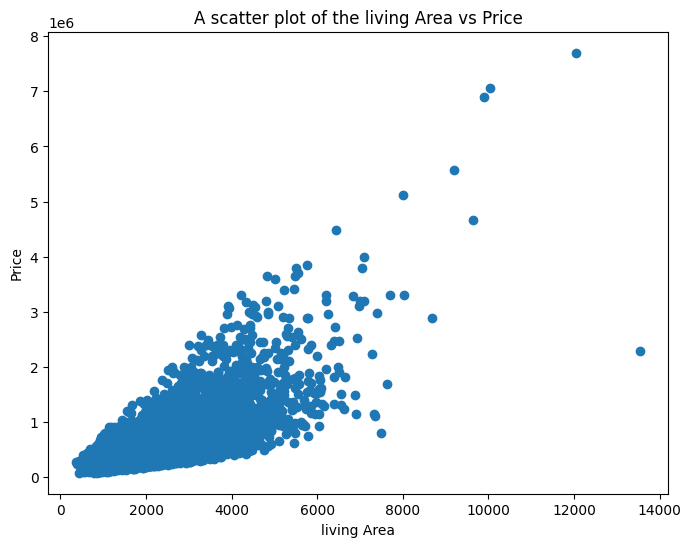

In [ ]:
plt.figure(figsize = (8,6))
plt.scatter(df['living area'], df['Price'])
plt.title('A scatter plot of the living Area vs Price')
plt.xlabel('living Area')
plt.ylabel('Price')
plt.savefig('Price vs Living Area')
plt.show()

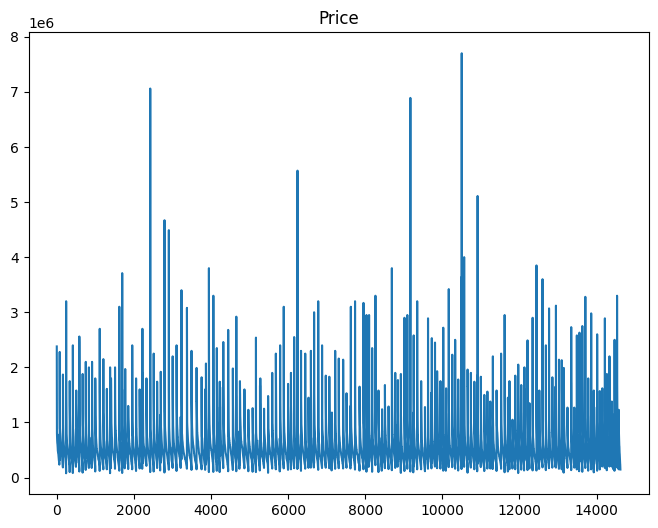

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(df['Price'])
plt.title('Price')
#plt.xlabel('living Area')
#lt.ylabel('Price')
plt.show()

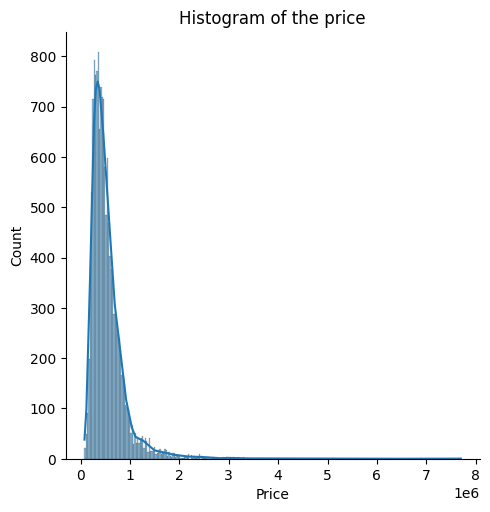

In [ ]:
plt.style.use('fast')
sns.displot(df['Price'], kde = True)
plt.title('Histogram of the price')
plt.savefig('hist plot')
plt.show()

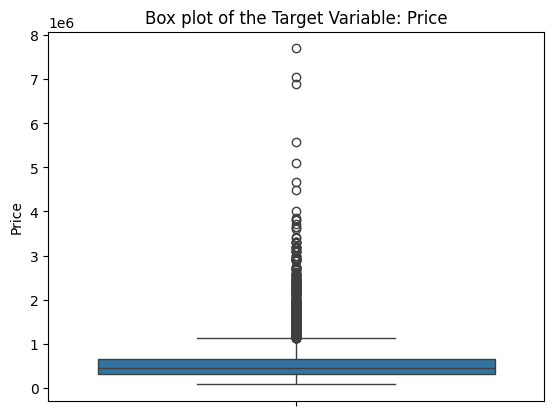

In [ ]:
sns.boxplot(df['Price'])
plt.title('Box plot of the Target Variable: Price')
plt.show()

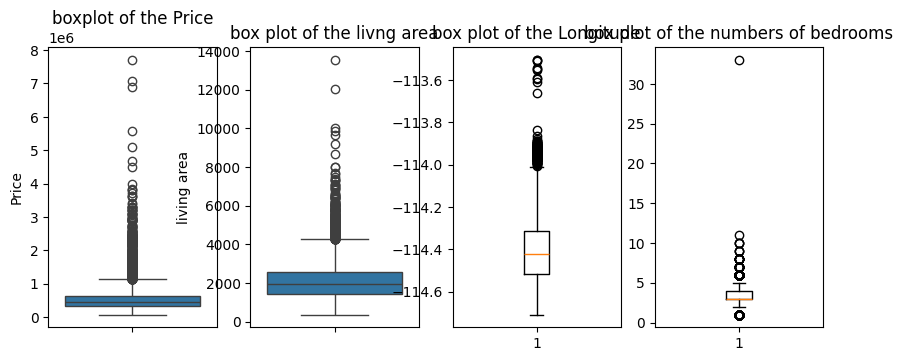

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,8))
plt.subplot(2,4,1)
sns.boxplot(df['Price'])
plt.title('boxplot of the Price')

plt.subplot(2,4,2)
sns.boxplot(df['living area'])
plt.title('box plot of the livng area')

plt.subplot(2,4,3)
plt.boxplot(df['Longitude'])
plt.title('box plot of the Longitude')


plt.subplot(2,4,4)
plt.boxplot(df['number of bedrooms'])
plt.title('box plot of the numbers of bedrooms')
plt.savefig('subplots')

plt.show()

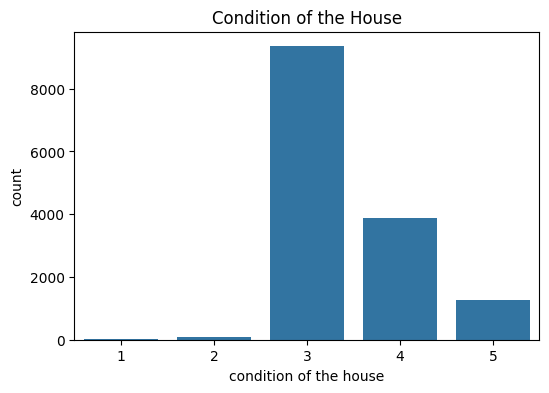

'from this visulization, we deduce that most of the houses were in good conditon, only few few were in a very bad condition'

In [ ]:
# let's visualize the condition of the house columnn
plt.figure(figsize=(6,4))
sns.countplot(x='condition of the house', data=df)
plt.title('Condition of the House')
plt.savefig('Condition of the house')
plt.show()
'''from this visulization, we deduce that most of the houses were in good conditon, only few few were in a very bad condition'''

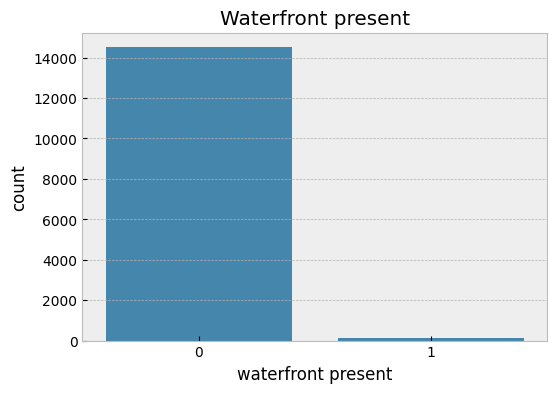

In [ ]:
# let's visualize the heat_waterfront present
plt.style.use('bmh')
plt.figure(figsize=(6,4))
sns.countplot(x='waterfront present', data=df)
plt.title('Waterfront present')
plt.savefig('Water Front Present')
plt.show()

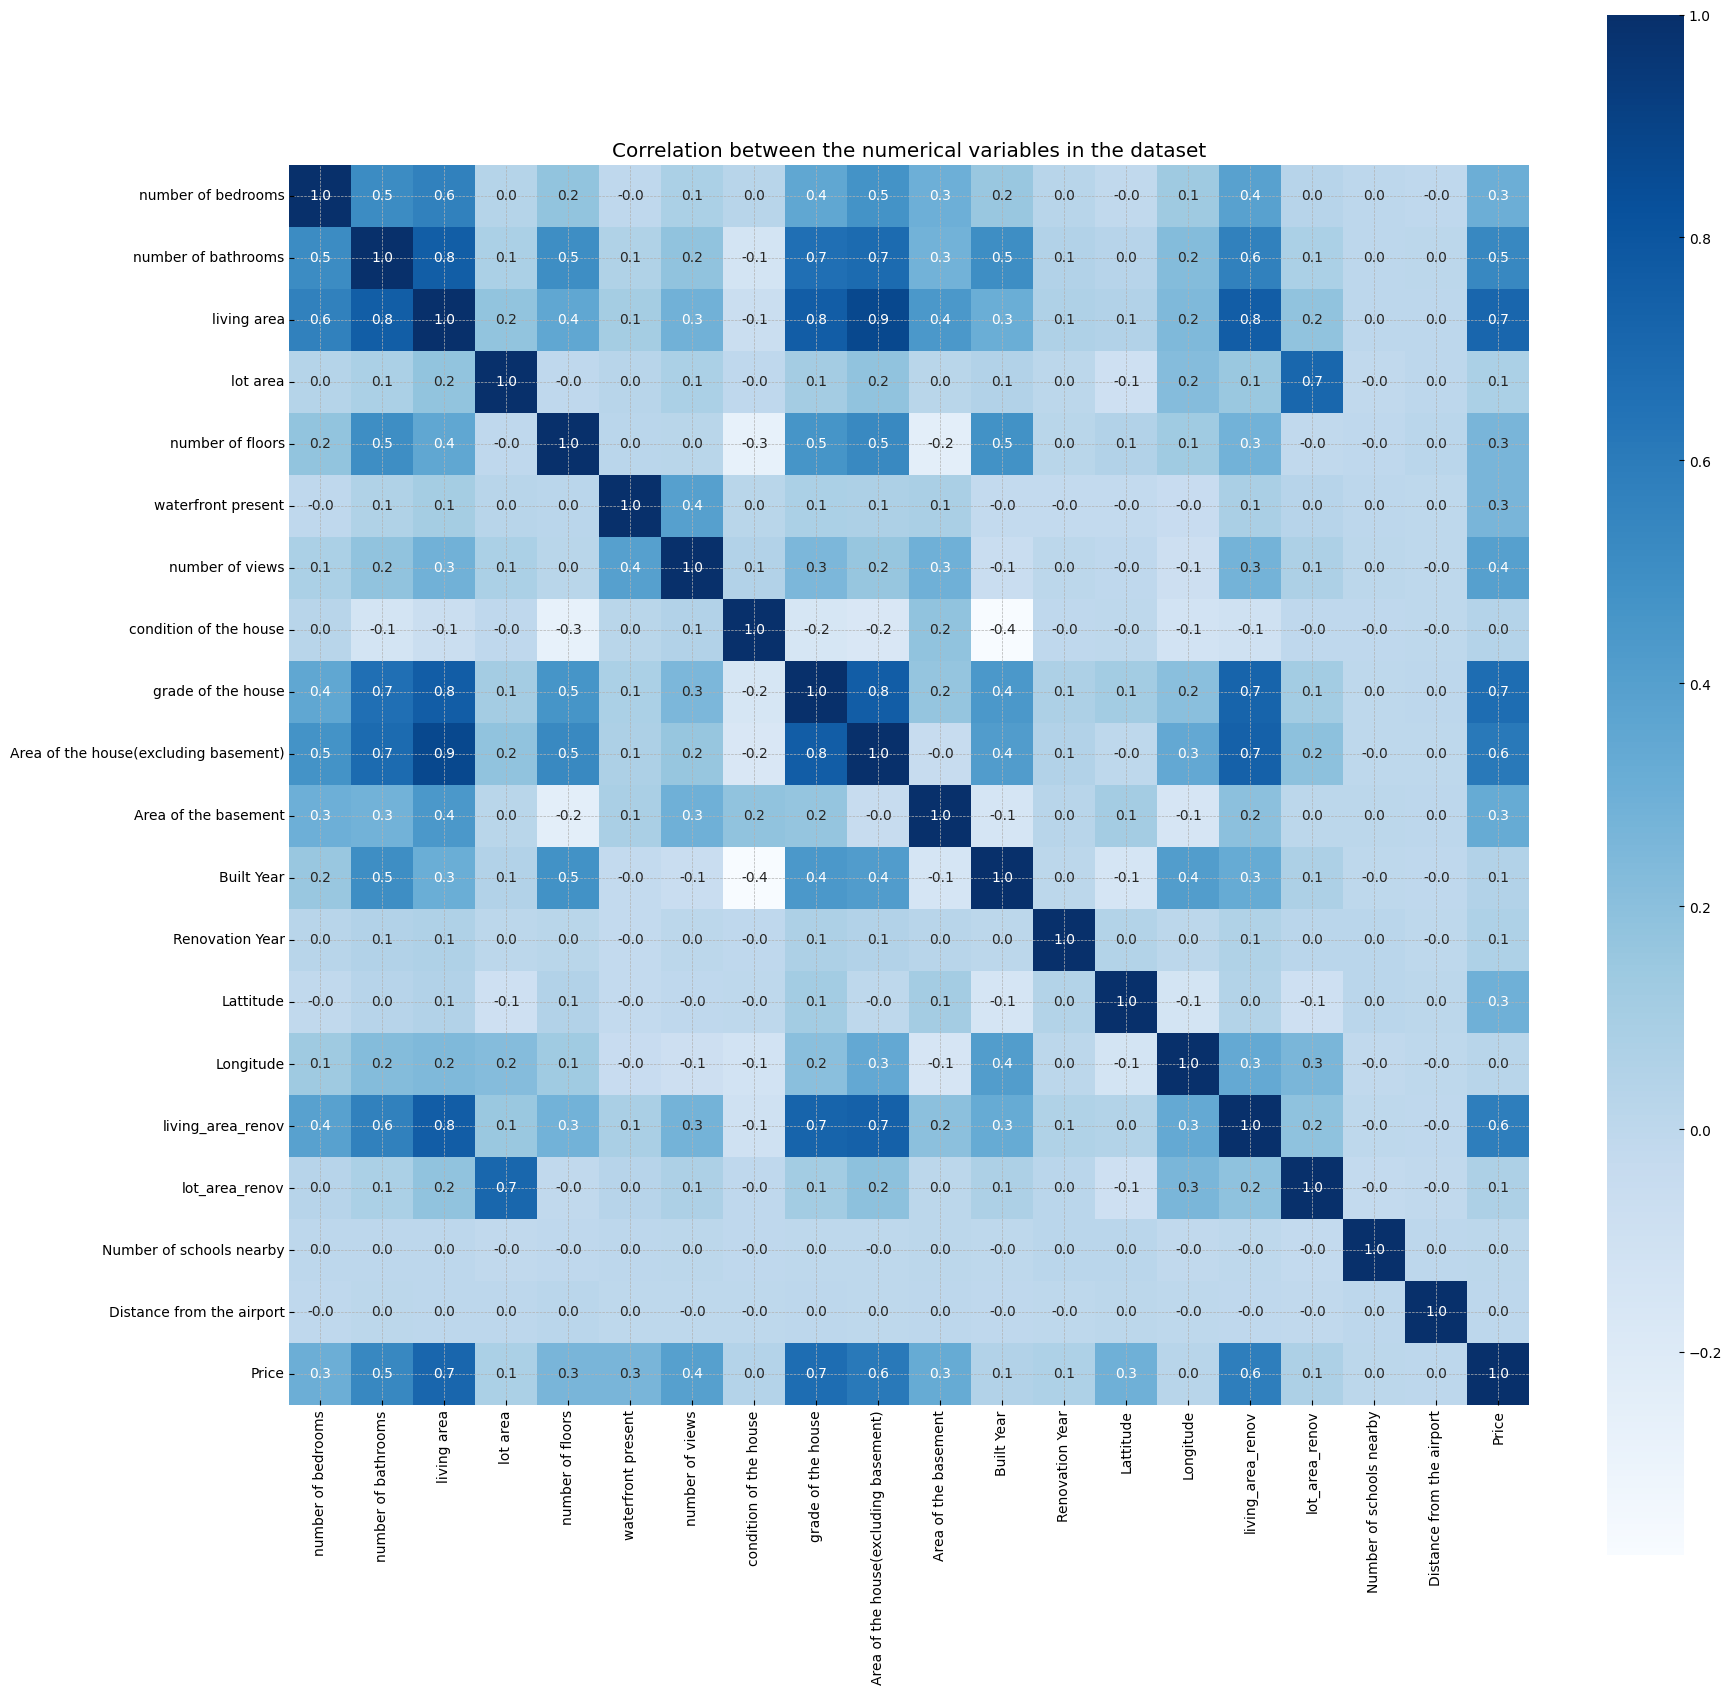

'From the Heat map, It is deduced that'

In [ ]:
# checking for the correlation between variables in the dataset
correlation_matrix = df2.corr()
# using the heatmap to visulize the correlation between variables in the dataset
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cbar=True, square=True, annot_kws={'size': 10}, fmt='.1f', cmap='Blues')
plt.title('Correlation between the numerical variables in the dataset')


#save the heatmap
plt.savefig('correlation_heatmap.png') #save as PNG file

plt.show()
'''From the Heat map, It is deduced that'''

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
correlation_matrix2 = df[['number of bedrooms', 'number of bathrooms','lot area', 'number of floors', 'Price']].corr()

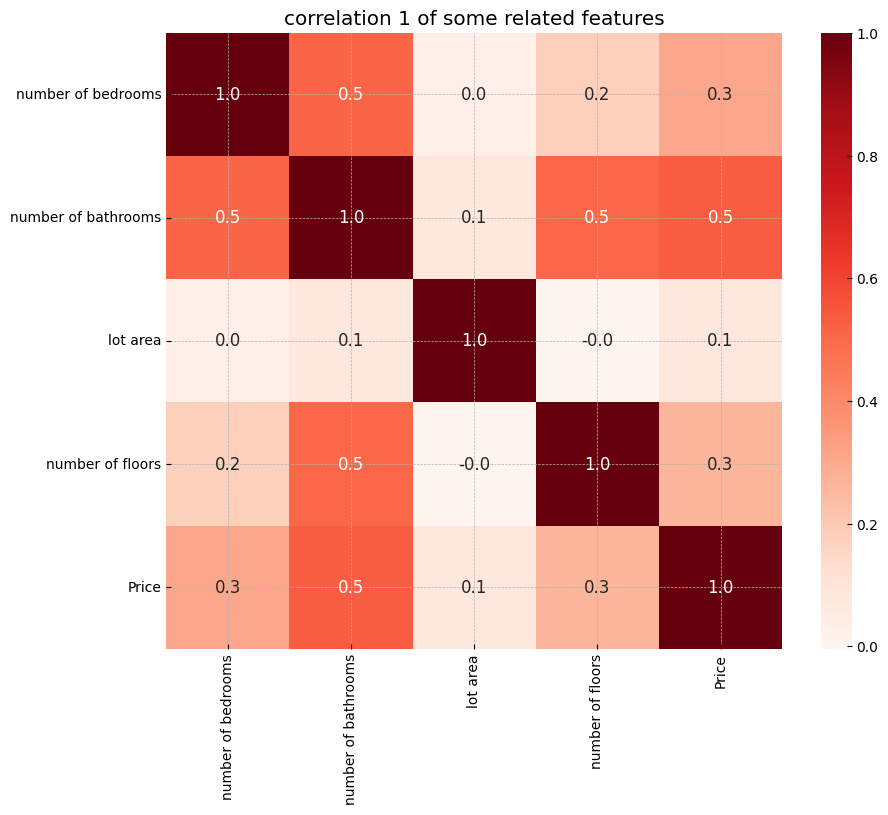

In [ ]:
# using the heatmap to visulize the correlation between variables of 'number of bedrooms', 'number of bathrooms','lot area', 'number of floors', 'Price  in the dataset
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix2, annot=True, cbar=True, square=True, annot_kws={'size': 12}, fmt = '.1f', cmap='Reds')
plt.title('correlation 1 of some related features')
plt.savefig('correlation_heatmap2.png') #save as PNG file
plt.show()

In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
correlation_matrix3 = df[['Longitude', 'number of bathrooms','Lattitude', 'Renovation Year', 'Price']].corr()

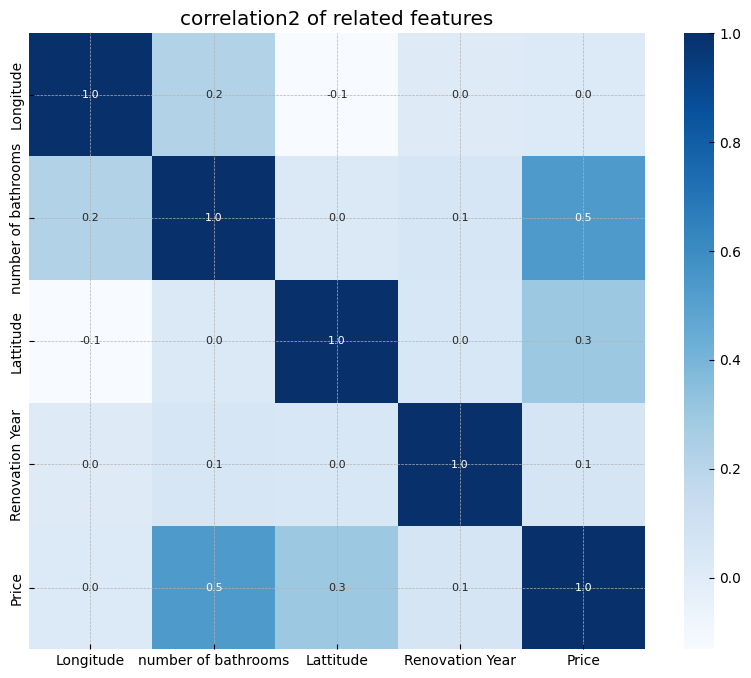

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix3, annot=True, cbar=True, square=True, annot_kws={'size': 8}, fmt = '.1f', cmap='Blues')
plt.title('correlation2 of related features')
plt.savefig('correlation heatmap3')
plt.show()

Feature Selection

In [ ]:
df.head(10)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,2016-05-01,5,2.50,3650,9050,2.0,0,4,5,10,3370,280,1921,1994,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,2016-05-01,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,1994,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,2016-05-01,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,1994,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,2016-05-01,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,1994,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,2016-05-01,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,1994,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,2016-05-01,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,1994,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,2016-05-01,5,3.25,3660,11995,2.0,0,2,3,10,3660,0,2006,1994,122008,52.7637,-114.050,3320,11241,3,72,785000
7,6762813599,2016-05-01,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,1994,122006,52.9254,-114.482,1570,10578,3,71,750000
8,6762813600,2016-05-01,3,2.50,2390,6550,1.0,0,2,4,8,1440,950,1955,1994,122009,52.8014,-114.598,2010,6550,1,73,750000
9,6762814461,2016-05-01,4,2.25,2200,11250,1.5,0,0,5,7,1300,900,1920,1994,122010,52.9145,-114.391,2320,10814,2,53,698000


**Splitting the Independent Variables from the Target Variable**

In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
#selecting the Important features and dropping the unnecesary ones
selected_features = df.drop(['id','Date','Price','Postal Code'], axis = 1)

In [ ]:
x = selected_features
y = df['Price']

In [ ]:
#print only the target variable
y.head()

,Price
0,2380000
1,1400000
2,1200000
3,838000
4,805000


In [ ]:
x.shape, y.shape

((14620, 19), (14620,))

Data Normalization or DataScaling

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
#view the x variable
print(x_scaled)

[[ 1.72651488  0.48111873  1.6716909  ... -0.28220257 -0.01498123
  -0.77788599]
 [ 0.66119676  0.48111873  0.88525972 ... -0.33592986 -0.01498123
  -1.56126035]
 [ 1.72651488  0.80583278  0.87448669 ... -0.23615061 -1.23858786
  -1.33743911]
 ...
 [-1.46943948 -1.46716559 -1.10775079 ... -0.2545714  -0.01498123
  -0.10642226]
 [ 0.66119676 -1.46716559 -1.15084291 ... -0.23496094  1.2086254
  -1.22552848]
 [-0.40412136 -1.46716559 -1.2908923  ... -0.35588571 -0.01498123
  -1.11361786]]


In [ ]:
x_scaled.shape

(14620, 19)

SPLITTING THE DATASET INTO TRAINNING AND TEST DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)

(11696, 19) (11696,)


In [ ]:
print(x_test.shape, y_test.shape)

(2924, 19) (2924,)


MODEL 1

TRAINING THE XGBREGRESSOR MODEL

In [ ]:
# model training phase
model = XGBRegressor()
model.fit(x_train, y_train)
'''Model trained successfully using the training data'''

'Model trained successfully using the training data'

In [ ]:
#accuracy prediction of the training data
y_pred = model.predict(x_train)


ACCURACY OF THE TRAINING DATA

In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_train, y_pred)
print('R squared error : ',score_1)

R squared error :  0.9836201667785645


In [ ]:
#mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, y_pred)
print('Mean Absolute Error: ', score_2)

Mean Absolute Error:  33577.21780483178


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_train, y_pred)
print(rms)

46780.16744437133


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_train, y_pred)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 0.08%


In [ ]:
#accuracy prediction of the training data
y_pred_test = model.predict(x_test)


ACCURACY OF THE MODEL USING THE TEST DATA

In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_test, y_pred_test)
print('R squared error : ', f'{score_1}%')

R squared error :  0.882176399230957%


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_test, y_pred_test)
print(rms)

128854.87369192201


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred_test)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 0.12%


TRAINING THE LINEAR REGRESSION MODEL

In [ ]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [ ]:
#accuracy prediction of the training data
y_pred2 = model2.predict(x_train)

ACCURACY OF THE LINEAR REGRESSION MODEL

In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_train, y_pred2)
print('R squared error of Model 2: ',score_1)

R squared error of Model 2:  0.6972500264968199


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_train, y_pred2)
print(f'Root Mean Error for the Model 2: {rms}')

Root Mean Error for the Model 2: 201117.02296451636


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape2 = mean_absolute_percentage_error(y_train, y_pred2)
print(f'Mean Absolute Percentage Error of Model 2: {mape2:.2f}%')

Mean Absolute Percentage Error of Model 2: 0.25%


In [ ]:
#accuracy prediction of the test data
y_pred_test2 = model2.predict(x_test)


ACCURACY OF THE MODEL 2 USING THE TEST DATA

In [ ]:
#Squared_Error
score_1 = metrics.r2_score(y_test, y_pred_test2)
print('R squared error : ', f'{score_1}%')

R squared error :  0.7185307214217801%


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms = root_mean_squared_error(y_test, y_pred_test2)
print(rms)

199159.12052322223


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred_test2)
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Percentage Error: 0.25%


**Evaluating the performance of the Linear Regression Model using Precision, F1_score Recall and Accuracy**

TRAINING THE MODEL 3 USING THE RANDOM FOREST REGRESSOR

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model3 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model3.fit(x_train, y_train)

# Make predictions
y_pred3= model3.predict(x_train)

ACCURACY OF THE RANDOM FOREST REGRESSION MODEL

In [ ]:
#Squared_Error
score_31 = metrics.r2_score(y_train, y_pred3)
print('R squared score of Model 3: ',score_31)

R squared score of Model 3:  0.9814130687278393


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms31 = root_mean_squared_error(y_train, y_pred3)
print(f'Root Mean Error for the Model 3: {rms31}')

Root Mean Error for the Model 3: 49832.26431134771


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape31 = mean_absolute_percentage_error(y_train, y_pred3)
print(f'Mean Absolute Percentage Error of Model 3: {mape31:.2f}%')

Mean Absolute Percentage Error of Model 3: 0.05%


In [ ]:

# Make predictions using the test data
y_pred_test3= model3.predict(x_test)

ACCURACY OF THE MODEL 3 USING THE TEST DATA

In [ ]:
#Squared_Error
score_32 = metrics.r2_score(y_test, y_pred_test3)
print('R squared  : ', f'{score_32}%')

R squared  :  0.8750922359090343%


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms32 = root_mean_squared_error(y_test, y_pred_test3)
print(rms32)

132672.04303791412


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape32 = mean_absolute_percentage_error(y_test, y_pred_test3)
print(f'Mean Absolute Percentage Error: {mape32:.2f}%')

Mean Absolute Percentage Error: 0.13%


TRAINING THE FOURTH MODEL: DECISON TREE

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
model4 = DecisionTreeRegressor()


In [ ]:
# Train the model
model4.fit(x_train, y_train)

# Making predictions
y_pred4= model4.predict(x_train)

ACCURACY OF THE DECISION TREE REGRESSOR MODEL

In [ ]:
#Squared_Error
score_41 = metrics.r2_score(y_train, y_pred4)
print('R squared score of Model 4: ',score_41)

R squared score of Model 4:  1.0


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms41 = root_mean_squared_error(y_train, y_pred4)
print(f'Root Mean Error for the Model 4: {rms41}')

Root Mean Error for the Model 4: 0.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape41 = mean_absolute_percentage_error(y_train, y_pred4)
print(f'Mean Absolute Percentage Error of Model 4: {mape41:.2f}%')

Mean Absolute Percentage Error of Model 4: 0.00%


In [ ]:

# Make predictions using the test data
y_pred_test4= model4.predict(x_test)

ACCURACY OF THE MODEL 4 USING THE TEST DATA

In [ ]:
#Squared_Error
score_42 = metrics.r2_score(y_test, y_pred_test4)
print('R squared  : ', f'{score_42}%')

R squared  :  0.7638978585360965%


In [ ]:
from sklearn.metrics import root_mean_squared_error

rms42 = root_mean_squared_error(y_test, y_pred_test4)
print(rms42)

182404.1280945274


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape42 = mean_absolute_percentage_error(y_test, y_pred_test4)
print(f'Mean Absolute Percentage Error: {mape42:.2f}%')

Mean Absolute Percentage Error: 0.18%


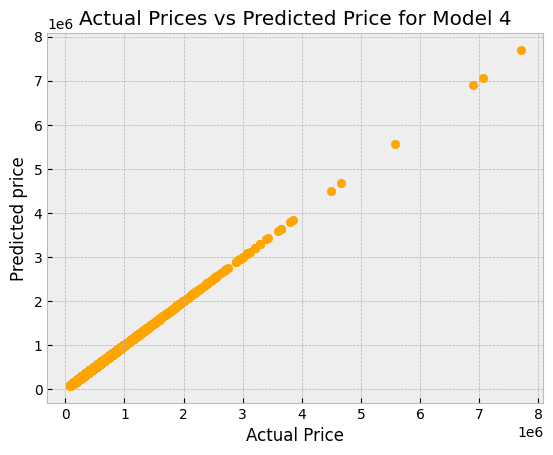

In [ ]:
plt.style.use('bmh')
plt.scatter(y_train, y_pred4, color = 'orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted price')
plt.title('Actual Prices vs Predicted Price for Model 4')
plt.show()

**Bulding A Predictive System Using The Best Model**

In [ ]:
input_data = (6762813599,42491,3,1.75,2240,10578,2,0,0,5,8,1550,690,1923,0,52.9254,-114.482,1570,10578,3,71)
input_data = input_data[2:24]
print(f'you now have {len(input_data)} entries')
# converting the input data into numpy arrays

input_data_as_array = np.asarray(input_data)
# reshape the array as we are predicting for one patient
input_data_reshaped = input_data_as_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

# Making the prediction
prediction = model4.predict(std_data)
print(prediction[0])

you now have 19 entry
[[-4.04121360e-01 -4.93023429e-01  1.52693697e-01 -1.19079131e-01
   9.21180431e-01 -8.78628402e-02 -3.04222791e-01  2.36323827e+00
   2.70281419e-01 -3.01978327e-01  8.77345119e-01 -1.62503054e+00
  -1.33015478e+02  9.63896131e-01 -5.51886768e-01 -6.17451812e-01
  -8.34883671e-02  1.20862540e+00  6.76952103e-01]]
750000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Building the predictive Interface

In [ ]:
import ipywidgets as widgets

In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
No_of_Rooms=widgets.IntText(
    value=2,
    min=1,
    step=1,
    description='Number of Bedrooms:',
    disabled=False
)
No_of_bathrooms=widgets.BoundedFloatText(
    value=2,
    min=0.5,
    max = 30.0,
    step=0.01,
    description='Number of Bathrooms:',
    disabled=False
)
Living_area=widgets.IntText(
    value=2,
    min=1,
    step=1,
    description='Living Area:',
    disabled=False
)
Lot_area=widgets.IntText(
    value=2,
    min=1,
    step=1,
    description='Lot Area:',
    disabled=False
)
No_of_Floors=widgets.FloatText(
    value=2,
    min=1,
    step=1,
    description='Number of Floors:',
    disabled=False
)
Water_front_present=widgets.FloatText(
    value=2,
    min=1,
    step=1,
    description='Waterfont Present:',
    disabled=False
)
Number_of_views=widgets.BoundedIntText(
    value=2,
    min=0,
    max=4,
    step=1,
    description='Number of views:',
    disabled=False
)
Condition_of_the_house=widgets.BoundedIntText(
    value=2,
    min=1,
    max=10,
    step=1,
    description='condition of the house:',
    disabled=False
)
Grade_of_the_house=widgets.BoundedIntText(
    value=10,
    min=4,
    max=13,
    step=1,
    description='Grade of the house:',
    disabled=False
)
Area_of_the_house1=widgets.IntText(
    value=2,
    min=1,
    step=1,
    description='Area of the house(excluding basement):',
    disabled=False
)
Area_of_the_Basement=widgets.IntText(
    value=2,
    min=1,
    step=1,
    description='Area of the Basement:',
    disabled=False
)
Built_year=widgets.BoundedIntText(
    value=1900,
    min=1963,
    max=2015,
    step=1,
    description='Built Year:',
    disabled=False
)
Renovation_year=widgets.BoundedIntText(
    value=1954,
    min=1900,
    max=2015,
    step=1,
    description='Renovation Year:',
    disabled=False
)
lattitude=widgets.BoundedFloatText(
    value=5,
    min=52.3859,
    max=53.0076,
    step=0.001,
    description='Lattitude:',
    disabled=False,
)
longitude=widgets.BoundedFloatText(
    value=-113.505,
    min=-115.000,
    max = -111.000,
    step=0.001,
    description='Longitude:',
    disabled=False
)
Living_area_renov=widgets.BoundedIntText(
    value=460,
    min=200,
    max=10000,
    step=1,
    description='Living Area Renovation:',
    disabled=False
)
Lot_area_renov=widgets.IntText(
    value=2,
    min=500,
    step=100,
    description='Lot Area Renovation:',
    disabled=False
)
number_of_schools_nearby=widgets.BoundedIntText(
    value=2,
    min=1,
    max=10,
    step=1,
    description='Number of Schools nearby:',
    disabled=False
)
distance_from_the_airport=widgets.IntText(
    value=3,
    min=1,
    step=1,
    description='Distance from the airport:',
    disabled=False
)


In [ ]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [ ]:
from IPython.display import clear_output

In [ ]:
predict_button = widgets.Button(description="Predict Price")
clear_button= widgets.Button(description='Clear')

#creating the predicted_price function
def predict_price(button):
  clear_output
  #creating a variable for the value of each features
  number_of_bedrooms = No_of_Rooms.value
  number_of_bathrooms = No_of_bathrooms.value
  living_area = Living_area.value
  lot_area = Lot_area.value
  number_of_floors = No_of_Floors.value
  waterfront_present = Water_front_present.value
  number_of_views = Number_of_views.value
  condition_of_the_house = Condition_of_the_house.value
  grade_of_the_house = Grade_of_the_house.value
  Area_of_the_house = Area_of_the_house1.value
  Area_of_the_basement = Area_of_the_Basement.value
  Built_Year = Built_year.value
  Renovation_Year = Renovation_year.value
  Lattitude = lattitude.value
  Longitude = longitude.value
  living_area_renov = Living_area_renov.value
  lot_area_renov = Lot_area_renov.value
  Number_of_schools_nearby = number_of_schools_nearby.value
  Distance_from_the_airport = distance_from_the_airport.value

  props = [[number_of_bedrooms,number_of_bathrooms,living_area,lot_area,number_of_floors,waterfront_present,number_of_views, condition_of_the_house, grade_of_the_house,
       Area_of_the_house,Area_of_the_basement,Built_Year,Renovation_Year,Lattitude,Longitude,living_area_renov, lot_area_renov,
       Number_of_schools_nearby,Distance_from_the_airport]]

  #converting the list and its values into a DataFrame
  props = pd.DataFrame(props, columns = ['number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport'])
  #

   # standardize the input data
  props = scaler.transform(props)
  #prediction of the house price using each of the models
  XGBRegressor_price = model.predict(props)
  linearRegressor_price = model2.predict(props)
  randomForest_price = model3.predict(props)
  decision_price = model4.predict(props)


  print(f"\nThe predicted selling price using XGBoost Regressor model is {XGBRegressor_price[0]:.2f}")
  print(f"\nThe predicted selling price using Linear Regressor model is {linearRegressor_price[0]:.2f}")
  print(f"\nThe predicted selling price using Random Forest Regressor model is {randomForest_price[0]:.2f}")
  print(f"\nThe predicted selling price is Decision Tree Regression model is {decision_price[0]:.2f}")
  print(f'\noverall price is',(XGBRegressor_price[0] + linearRegressor_price[0]+ randomForest_price[0]+ decision_price[0])/4)

def clear(button):
  clear_output()
  display(No_of_Rooms, No_of_bathrooms,Living_area,Lot_area,No_of_Floors,Water_front_present,Number_of_views,Condition_of_the_house,Grade_of_the_house, Area_of_the_house1,Area_of_the_Basement,Built_year,Renovation_year,lattitude,longitude,Living_area_renov,Lot_area_renov,number_of_schools_nearby,distance_from_the_airport,predict_button,clear_button)
clear_button.on_click(clear)

predict_button.on_click(predict_price)
display(No_of_Rooms, No_of_bathrooms,Living_area,Lot_area,No_of_Floors,Water_front_present,Number_of_views,Condition_of_the_house,Grade_of_the_house, Area_of_the_house1,Area_of_the_Basement,Built_year,Renovation_year,lattitude,longitude,Living_area_renov,Lot_area_renov,number_of_schools_nearby,distance_from_the_airport,predict_button,clear_button)


IntText(value=2, description='Number of Bedrooms:')

BoundedFloatText(value=1.75, description='Number of Bathrooms:', max=30.0, min=0.5, step=0.01)

IntText(value=90, description='Living Area:')

IntText(value=25, description='Lot Area:')

FloatText(value=2.0, description='Number of Floors:', step=1.0)

FloatText(value=2.0, description='Waterfont Present:', step=1.0)

BoundedIntText(value=2, description='Number of views:', max=4)

BoundedIntText(value=2, description='condition of the house:', max=10, min=1)

BoundedIntText(value=10, description='Grade of the house:', max=13, min=4)

IntText(value=2, description='Area of the house(excluding basement):')

IntText(value=2, description='Area of the Basement:')

BoundedIntText(value=1963, description='Built Year:', max=2015, min=1963)

BoundedIntText(value=1954, description='Renovation Year:', max=2015, min=1900)

BoundedFloatText(value=52.3859, description='Lattitude:', max=53.0076, min=52.3859, step=0.001)

BoundedFloatText(value=-113.505, description='Longitude:', max=-111.0, min=-115.0, step=0.001)

BoundedIntText(value=522, description='Living Area Renovation:', max=10000, min=200)

IntText(value=1500, description='Lot Area Renovation:', step=100)

BoundedIntText(value=3, description='Number of Schools nearby:', max=10, min=1)

IntText(value=71, description='Distance from the airport:')

Button(description='Predict Price', style=ButtonStyle())

Button(description='Clear', style=ButtonStyle())

In [ ]:
3,1.75,2240,10578,2,0,0,5,8,1550,690,1923,0,52.9254,-114.482,1570,10578,3,71